# TASK 1.1

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

In [8]:
import os
import numpy as np

# kmeans clustering algorithm
# data = set of data points
# k = number of clusters
# c = initial list of centroids (if provided)
#
def kmeans(data, k, c=None):
    centroids = []

    centroids = randomize_centroids(data, centroids, k)  

    old_centroids = [[] for i in range(k)] 

    iterations = 0
    while not (has_converged(centroids, old_centroids, iterations)):
        iterations += 1

        clusters = [[] for i in range(k)]

        # assign data points to clusters
        clusters = euclidean_dist(data, centroids, clusters)

        # recalculate centroids
        index = 0
        for cluster in clusters:
            old_centroids[index] = centroids[index]
            centroids[index] = np.mean(cluster, axis=0).tolist()
            index += 1


    print("The total number of data instances is: " + str(len(data)))
    print("The total number of iterations necessary is: " + str(iterations))
    print("The means of each cluster are: " + str(centroids))
    print("The clusters are as follows:")
    for cluster in clusters:
        print("Cluster with a size of " + str(len(cluster)) + " starts here:")
        print(np.array(cluster).tolist())
        print("Cluster ends here.")

    return clusters


def euclidean_dist(data, centroids, clusters):
    for instance in data:  
        mu_index = min([(i[0], np.linalg.norm(instance-centroids[i[0]])) \
                            for i in enumerate(centroids)], key=lambda t:t[1])[0]
        try:
            clusters[mu_index].append(instance)
        except KeyError:
            clusters[mu_index] = [instance]
  
    for cluster in clusters:
        if not cluster:
            cluster.append(data[np.random.randint(0, len(data), size=1)].flatten().tolist())

    return clusters

def randomize_centroids(data, centroids, k):
    for cluster in range(0, k):
        centroids.append(data[np.random.randint(0, len(data), size=1)].flatten().tolist())
    return centroids

def has_converged(centroids, old_centroids, iterations):
    MAX_ITERATIONS = 1000
    if iterations > MAX_ITERATIONS:
        return True
    return old_centroids == centroids

# TASK 1.2 
The models are similar. 

In [9]:
np.random.seed(0)
n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X, y = (np.dot(X, transformation), y)

In [10]:
centers = kmeans(X, 3, None)
colors = [] # colors for plot
new_centers = [] # reshape, the old way
for i in range(len(centers)):
    colors.extend([i] * len(centers[i]))
    new_centers.extend(centers[i])

The total number of data instances is: 1500
The total number of iterations necessary is: 21
The means of each cluster are: [[-2.587661107569353, 0.8067133464204701], [-3.289954446311303, 2.928041304754928], [1.0128482991925107, -0.8591691440197333]]
The clusters are as follows:
Cluster with a size of 507 starts here:
[[-3.4855299327668035, 0.46412084214170535], [-2.2894285156247896, -0.05719773794182989], [-3.119123579209402, 1.1049763778402062], [-3.4586113146501534, 1.6269087799811508], [-0.9555876864347036, 0.38827835511306136], [-3.204891505036908, 1.0738931281684077], [-2.367211382653947, 0.5132514915046037], [-3.1305911383901357, 0.6865850079116324], [-3.4760557493068025, 1.5563479716826838], [-2.0869367180578786, -0.7135412638701077], [-2.5539092468649796, -0.18424666178087068], [-3.0623991604725416, 0.44613626113569704], [-2.9371504152633814, 0.9856219043951796], [-2.5465585531136052, 0.2365875957579795], [-3.7648766537163327, 1.271242906505396], [-1.7848571170468375, 0.9445266

In [11]:
# sklearn version
centersSKL = MiniBatchKMeans(n_clusters=3)
centersSKL.fit(X)
y_pred = centersSKL.predict(X)

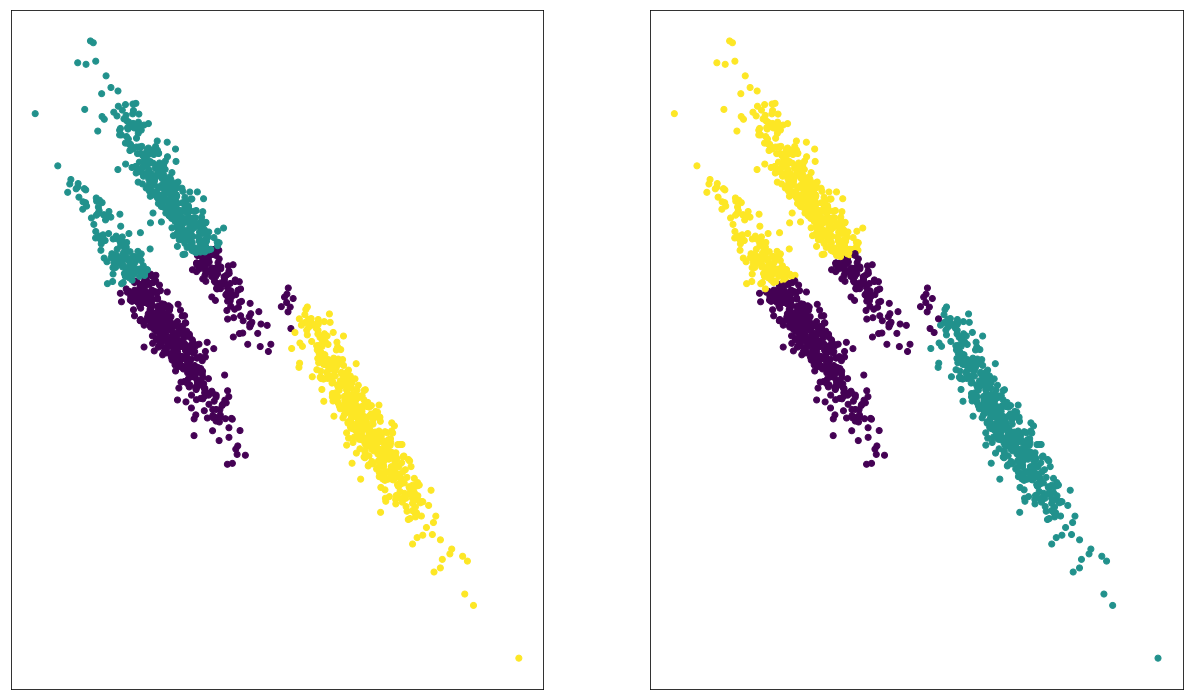

In [12]:
plt.figure(figsize=(9 * 2 + 3, 12.5))
x = [ x[0] for x in new_centers]
y = [ x[1] for x in new_centers]
plt.subplot(1, 2, 1) # your subplot
plt.scatter(x, y, c=colors)
plt.xticks(());plt.yticks(())
plt.subplot(1, 2, 2) # sklearn subplot
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xticks(());plt.yticks(())
plt.show()

# TASK 1.3

All the elements in the dataset are added to the nearest centroid that are randomly initialized. After this are all the centroids recalculated, and these will then become the new centers of their clusters. Then we will reset, and re-plot all the elements  and add them to their nearest centroid cluster. This will be repeated until convergence. 
In worst cast can poor initialization lead to increased numbers of iterations to reach convergence.

# TASK 2.1

K-Means: 
- Uses hard classification, which might lead to miss classification. 
- Each point only record its class by nearest centroid. 
- Uses only the points in the same class to update, therefore it has better running time. 

GMM: 
- Uses soft classification 
- Each point record possibilites for all classes. 
- Uses the points of all the instances to update.

In [5]:
import numpy as np; 
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

In [3]:
np.random.seed(0)
# ============
# Generate datasets
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = (np.dot(X, transformation), y)
# The datasets, shown as rows
datasets = [
(noisy_circles, {'damping': .77, 'preference': -240,
'quantile': .2, 'n_clusters': 2}),
(noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
(aniso, {'eps': .15, 'n_neighbors': 2}),
(blobs, {}),
(no_structure, {})]

In [4]:
# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters=3)
gmm = mixture.GaussianMixture(
n_components=3, covariance_type='full')
# the algorithms shown as colors
clustering_algorithms = (
('MiniBatchKMeans', two_means), ('GaussianMixture', gmm)
)

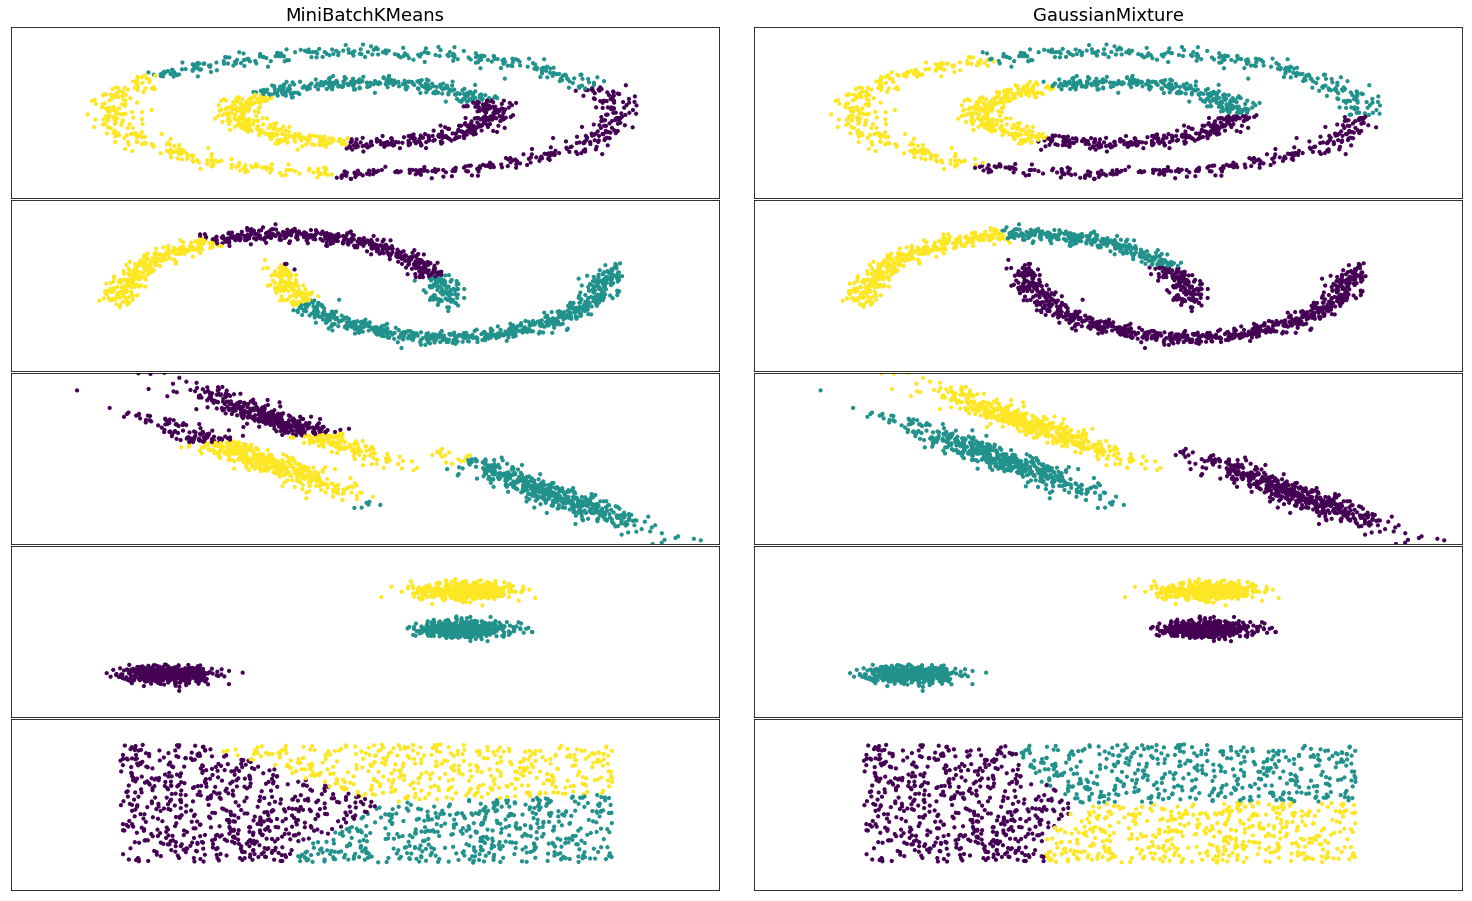

In [5]:
# ============
# Set up figure settings
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5)); plot_num = 1
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
hspace=.01)
for i_dataset, (dataset, algo_params) in enumerate(datasets):
# split in data and classes
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)
        y_pred = algorithm.predict(X)
        # make plot fancy
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
        plt.xlim(-2.5, 2.5);plt.ylim(-2.5, 2.5)
        plt.xticks(());plt.yticks(())
        plot_num += 1
plt.show()

# TASK 3.1 

In [2]:
import scipy.cluster.hierarchy as hier
from scipy.spatial.distance import pdist
import distance

In [3]:
data = ["ATGTAAA", "ATGAAAA", "ACGTGAA", "ACGAGGG", "ACGAGGA", "ACGAGTC", "ACGAGCC"]
labels = ["shark", "ray-finned fish", "amphibians", "primates", "rodents", "crocodiles", "dinosaurs"]

0125455

1034344

2303233

5430122

4321022

5432201

5432210



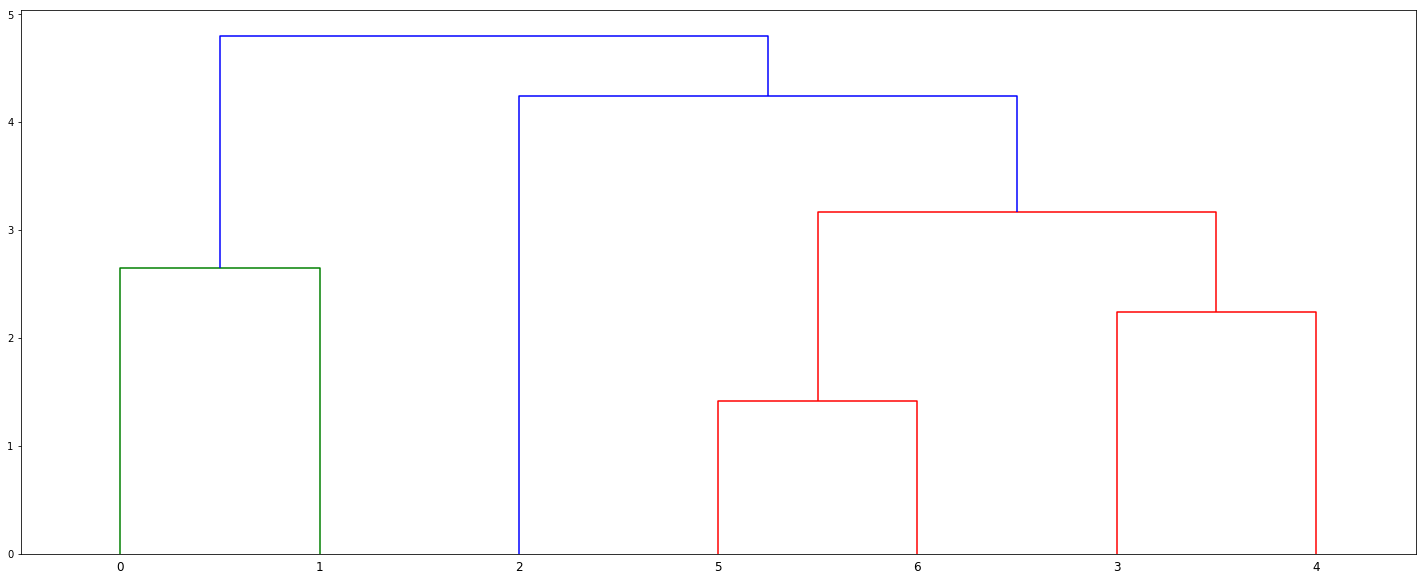

In [6]:
# The levenshtein distance matrix ->
mat = np.zeros((len(data), len(data)), dtype=int)
for i in range(0, len(data)):
    for j in range(0, len(data)):
        mat[i][j] = distance.levenshtein(data[i], data[j])
        print(mat[i][j], end="")
    print("\n")

mat = pdist(mat) # make an upper triangle matrix
# The hierarchy clustering ->
# here run scipy.cluster.hierarchy.linkage() on triangle matrix
z = hier.linkage(mat)
fig = plt.figure(figsize=(25, 10))
# here run scipy.cluster.hierarchy.dendrogram() with the linkage z and labels = labels
dn =hier.dendrogram(z,len(labels))
plt.show()